In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [7]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [8]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [11]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


# Precipitation Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data;
# Latest Date by descending order (see 02_Ins_Dates)
current = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(current)

('2017-08-23',)


In [16]:
# Calculate the date 1 year ago from the most recent date
yearago = dt.date(2017,8,23) - dt.timedelta(days=365)
print (yearago)

2016-08-23


In [17]:
# Perform a query to retrieve the data and precipitation scores
# all results after 2016-08-23 (12 months)
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()


In [18]:
#Save the query results as a Pandas
precipitation_df = pd.DataFrame(precipitation_data)
precipitation_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [19]:
# Identify incomplete rows
precipitation_df.count()

date    2223
prcp    2015
dtype: int64

In [20]:
# Drop all rows with missing information
precipitation_df = precipitation_df.dropna(how='any')

In [21]:
# Verify dropped rows
precipitation_df.count()

date    2015
prcp    2015
dtype: int64

In [22]:
#Set the index to the date column
precipitation_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


In [23]:
# Sort the DataFrame values by `date`
precipitation_df = precipitation_df.sort_values(by='date')

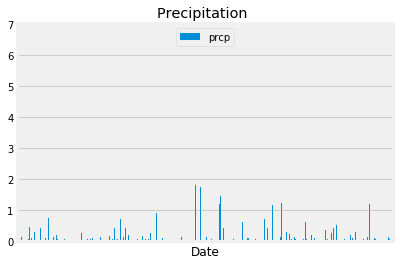

In [24]:
# Use Pandas Plotting with Matplotlib to plot the data
# Configure plot and ticks
precipitation_df.plot(kind="bar")
plt.legend(loc='upper center')
plt.title("Precipitation ")
plt.xlabel("Date")
plt.xticks([])
plt.savefig("Precipitation.png")


![precipitation](Images/precipitation.png)

In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

# Station Analysis

In [26]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Measurement.station).distinct().count()
print(stations)

9


In [27]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc())
active_stations.all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the station id from the previous query, identify the most active station
# Which station has the highest number of observations?
mostactive = active_stations[0][0]
print(mostactive)

USC00519281


In [29]:
# Using the station id for the most active station, find the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

querytemps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.station == mostactive).all()
print(querytemps)   

[(54.0, 85.0, 71.66378066378067)]


In [30]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station

#all temperatures for most active station for past 12 months
station_temps = session.query(Measurement.tobs).\
    filter(Measurement.date > '2016-08-23').\
    filter(Measurement.station == mostactive).\
    order_by(Measurement.tobs).all()
print(station_temps)

[(59.0,), (59.0,), (59.0,), (60.0,), (60.0,), (61.0,), (62.0,), (62.0,), (62.0,), (62.0,), (62.0,), (62.0,), (63.0,), (63.0,), (63.0,), (63.0,), (64.0,), (64.0,), (64.0,), (65.0,), (65.0,), (65.0,), (65.0,), (65.0,), (65.0,), (65.0,), (66.0,), (66.0,), (66.0,), (66.0,), (66.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (67.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (68.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (69.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (70.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), (71.0,), 

In [31]:
#Save the query results as a Pandas
stationtemps_df = pd.DataFrame(station_temps)
stationtemps_df.head()    

,tobs
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


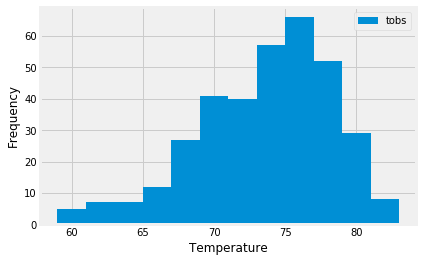

In [32]:
# plot the results as a histogram; use 12 bins for each month 
# Plot the results as a histogram with `bins=12`.
plt.hist(stationtemps_df['tobs'], bins=12)  
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"])


![precipitation](Images/station-histogram.png)

# Optional: Other Recommended Analyses

In [33]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [34]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [35]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [36]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [37]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [38]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [39]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [40]:
# Plot the daily normals as an area plot with `stacked=False`
